# Actividad 2.1

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib

from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Etiquetar las imagenes

In [17]:
data_directory = pathlib.Path('./dataset/training_set/')
class_names = [item.name for item in data_directory.glob('*')][:2]
print(class_names)

['cats', 'dogs']


#### Cargar los datos

In [37]:
# Cargar los datos
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_dir = "./dataset/training_set"
test_dir = "./dataset/test_set"

path = "/dataset"

train_data = data_gen.flow_from_directory("./dataset/training_set/", 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory("./dataset/test_set/", 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 6400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [19]:
def plot_random_images(num):
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (15, 15))
    
    for image, label in zip(images, labels):
        plt.subplot(5, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == num+1:
            break

    plt.tight_layout()       
    plt.show()

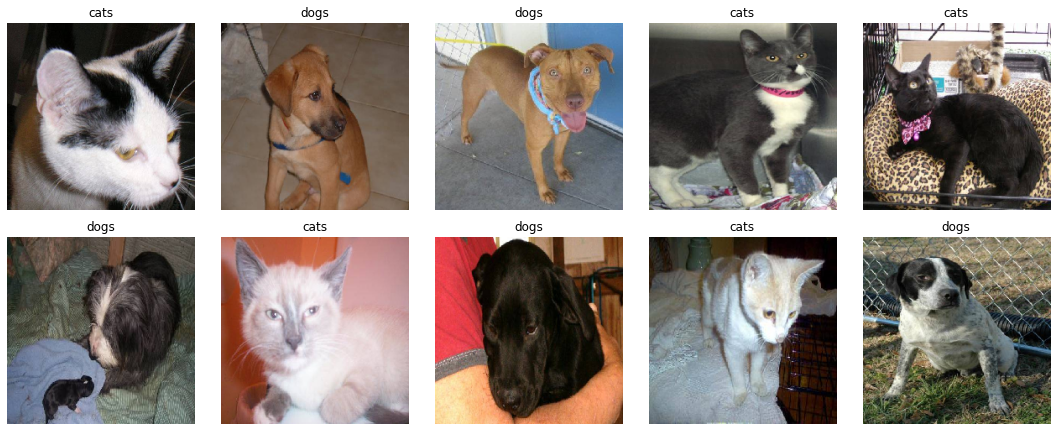

In [20]:
plot_random_images(10)

In [24]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
						#	width_shift_range = 0.2,
						#	height_shift_range = 0.2,
						#	shear_range = 0.3,
						#	zoom_range = 0.3,
							
							horizontal_flip = True,)

Found 8000 images belonging to 2 classes.


<Figure size 432x288 with 0 Axes>

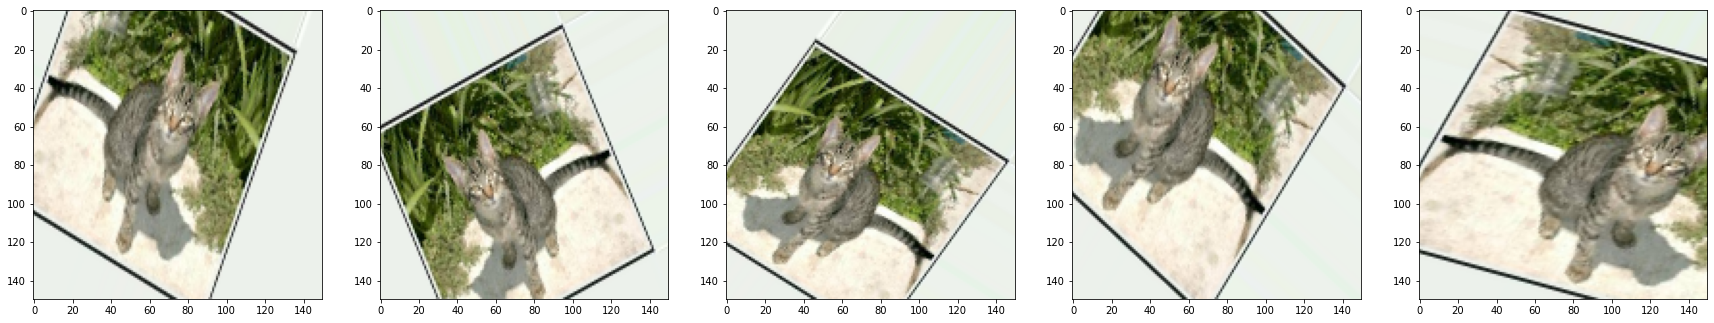

In [31]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 1,
							class_mode ='binary',
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8)) 

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 8000 images belonging to 2 classes.
(8, 150, 150, 3)
[0. 0. 0. 1. 0. 1. 1. 0.]


<Figure size 432x288 with 0 Axes>

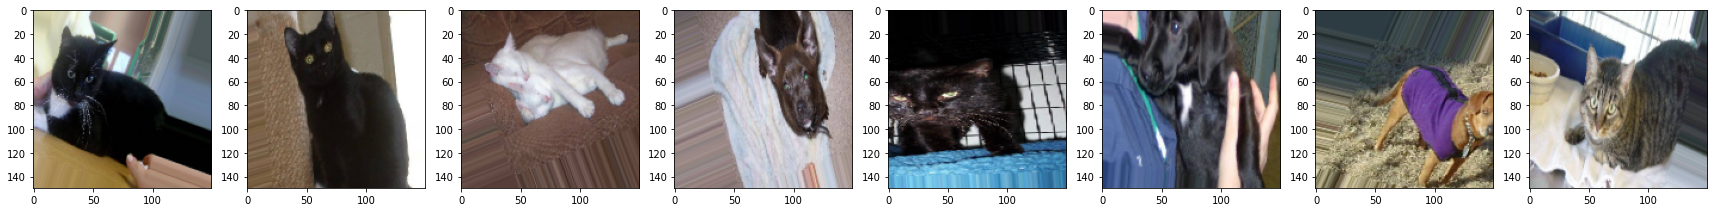

In [32]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])